In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MFGEmployees.csv')

In [4]:
df.head(10)

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
0,1,Gutierrez,Molly,F,Burnaby,Baker,Bakery,Burnaby,Stores,32.028816,6.018478,36.577306,Stores
1,2,Hardwick,Stephen,M,Courtenay,Baker,Bakery,Nanaimo,Stores,40.320902,5.532445,30.165072,Stores
2,3,Delgado,Chester,M,Richmond,Baker,Bakery,Richmond,Stores,48.822047,4.389973,83.807798,Stores
3,4,Simon,Irene,F,Victoria,Baker,Bakery,Victoria,Stores,44.599357,3.081736,70.020165,Stores
4,5,Delvalle,Edward,M,New Westminster,Baker,Bakery,New Westminster,Stores,35.697876,3.619091,0.000000,Stores
5,6,Jones,Ernie,M,Richmond,Baker,Bakery,Richmond,Stores,48.440311,2.717692,81.830079,Stores
6,7,Buford,Ralph,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,50.752730,10.157918,60.495072,HeadOffice
7,8,Lee,Gregory,M,Sechelt,Baker,Bakery,West Vancouver,Stores,36.216031,4.432123,30.072902,Stores
8,9,Smith,Jerry,M,New Westminster,Baker,Bakery,New Westminster,Stores,58.427380,6.940121,181.630819,Stores
9,10,Beard,Robert,M,Vancouver,Accounting Clerk,Accounting,Vancouver,FinanceAndAccounting,39.853980,13.848321,30.664408,HeadOffice


In [5]:
# Check for missing values
print(df.isnull().sum())

EmployeeNumber    0
Surname           0
GivenName         0
Gender            0
City              0
JobTitle          0
DepartmentName    0
StoreLocation     0
Division          0
Age               0
LengthService     0
AbsentHours       1
BusinessUnit      0
dtype: int64


In [6]:
df[df.isnull().any(axis=1)]

,EmployeeNumber,Surname,GivenName,Gender,City,JobTitle,DepartmentName,StoreLocation,Division,Age,LengthService,AbsentHours,BusinessUnit
118,119,Torres,Lee,M,Vancouver,Accounts Payable Clerk,Accounts Payable,Vancouver,FinanceAndAccounting,33.17869,3.616228,NaN,HeadOffice


In [ ]:
#taking means
df['AbsentHours'].fillna(df['AbsentHours'].mean(), inplace = True)

C:\Users\arshu\AppData\Local\Temp\ipykernel_10976\407078433.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AbsentHours'].fillna(df['AbsentHours'].mean(), inplace = True)


In [ ]:
#showing row of corrected missing values
df.iloc[118]

EmployeeNumber                       119
Surname                           Torres
GivenName                            Lee
Gender                                 M
City                           Vancouver
JobTitle          Accounts Payable Clerk
DepartmentName          Accounts Payable
StoreLocation                  Vancouver
Division            FinanceAndAccounting
Age                             33.17869
LengthService                   3.616228
AbsentHours                    61.274802
BusinessUnit                  HeadOffice
Name: 118, dtype: object

In [10]:
len(df)

8340

In [ ]:
#Everyone under 18 or above 65 may be removed from the data set
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

In [12]:
len(df)

8168

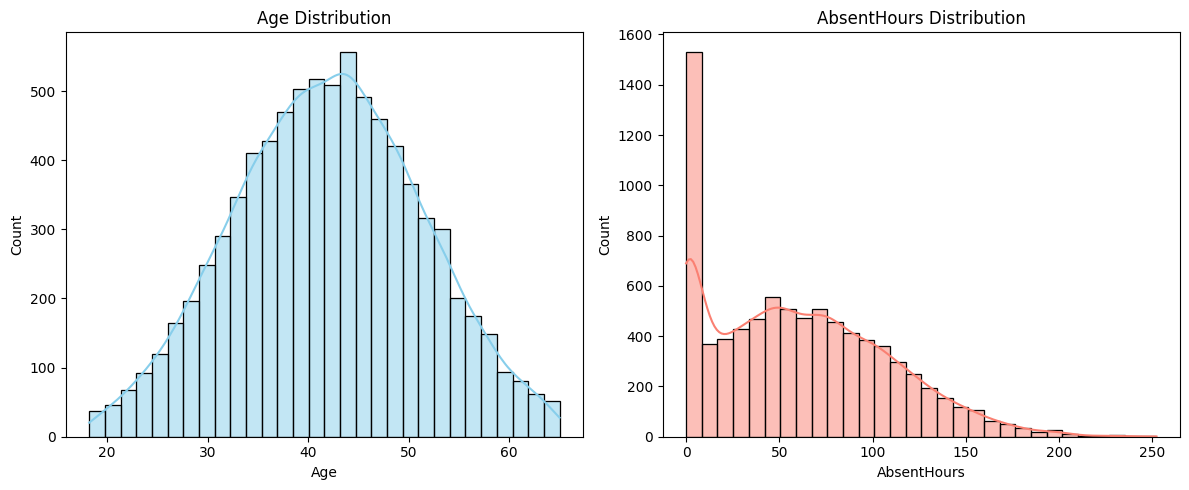

In [13]:
#EDA
#Histogram
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.histplot(df['AbsentHours'], bins=30, kde=True, color='salmon')
plt.title("AbsentHours Distribution")

plt.tight_layout()
plt.show()


C:\Users\arshu\AppData\Local\Temp\ipykernel_10976\1812848372.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='AbsentHours', palette='Set2')


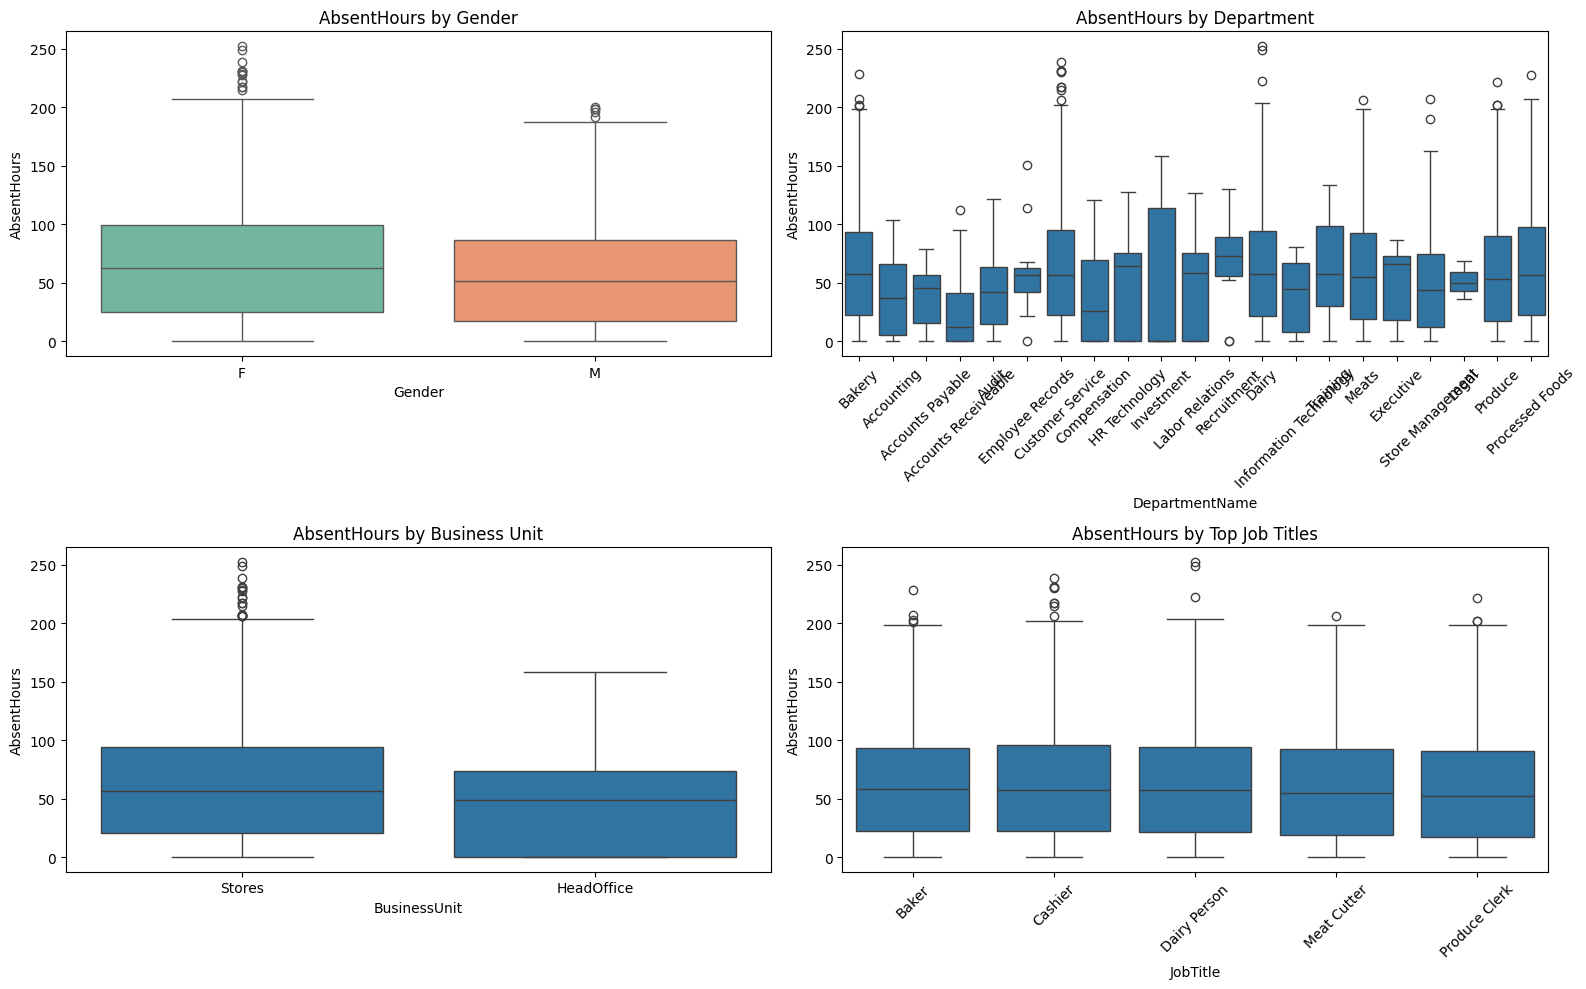

In [14]:
#Boxplot
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Gender', y='AbsentHours', palette='Set2')
plt.title("AbsentHours by Gender")

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='DepartmentName', y='AbsentHours')
plt.xticks(rotation=45)
plt.title("AbsentHours by Department")

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='BusinessUnit', y='AbsentHours')
plt.title("AbsentHours by Business Unit")

plt.subplot(2, 2, 4)
top_jobs = df['JobTitle'].value_counts().index[:5]
sns.boxplot(data=df[df['JobTitle'].isin(top_jobs)], x='JobTitle', y='AbsentHours')
plt.xticks(rotation=45)
plt.title("AbsentHours by Top Job Titles")

plt.tight_layout()
plt.show()


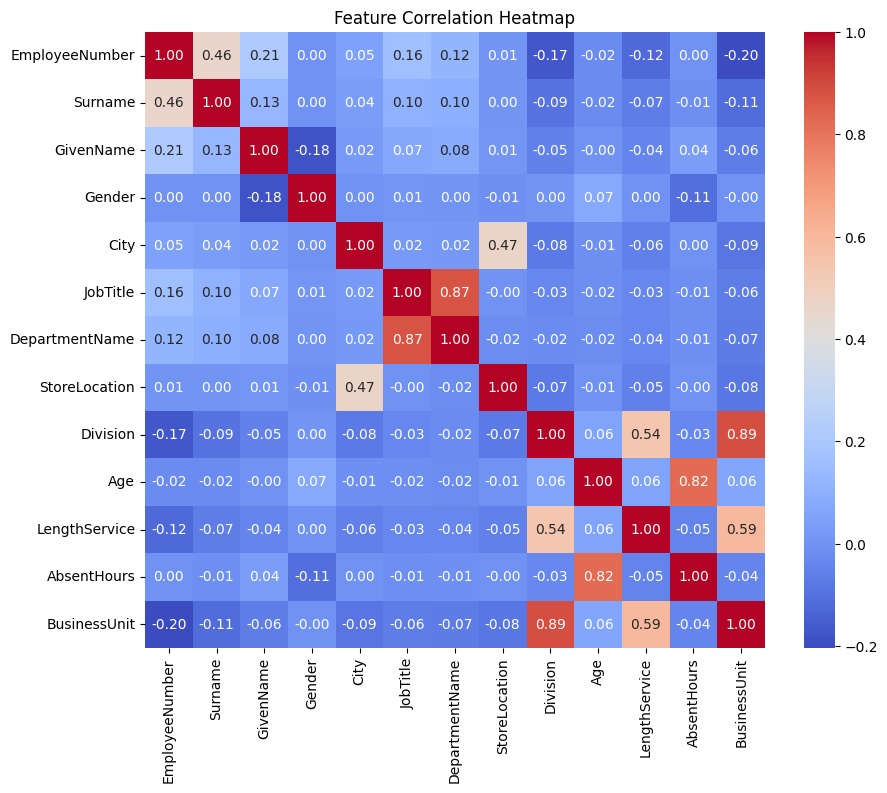

In [15]:
#Correlation heatmap
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = pd.factorize(df_encoded[col])[0]

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder

# Make a copy of your cleaned dataset
df_encoded = df.copy()

# Encode all object columns
for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Show comparison of first few rows
print(df_encoded.head())



   EmployeeNumber  Surname  GivenName  Gender  City  JobTitle  DepartmentName  \
0               1     1534       1130       0    28         4               4   
1               2     1596       1438       1    51         4               4   
2               3      930        262       1   179         4               4   
3               4     3369        679       0   226         4               4   
4               5      935        447       1   143         4               4   

   StoreLocation  Division        Age  LengthService  AbsentHours  \
0              4         5  32.028816       6.018478    36.577306   
1             17         5  40.320902       5.532445    30.165072   
2             28         5  48.822047       4.389973    83.807798   
3             36         5  44.599357       3.081736    70.020165   
4             20         5  35.697876       3.619091     0.000000   

   BusinessUnit  
0             1  
1             1  
2             1  
3             1  
4       

In [64]:
df.head(10)
print(df_encoded.head(10))

   EmployeeNumber  Surname  GivenName  Gender  City  JobTitle  DepartmentName  \
0               1     1534       1130       0    28         4               4   
1               2     1596       1438       1    51         4               4   
2               3      930        262       1   179         4               4   
3               4     3369        679       0   226         4               4   
4               5      935        447       1   143         4               4   
5               6     1893        509       1   179         4               4   
6               7      494       1246       1   222         0               0   
7               8     2126        617       1   191         4               4   
8               9     3405        751       1   143         4               4   
9              10      218       1291       1   222         0               0   

   StoreLocation  Division        Age  LengthService  AbsentHours  \
0              4         5  32.028816  

In [53]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of your cleaned DataFrame to encode
df_encoded = df.copy()

# Initialize label encoder
le = LabelEncoder()

# Encode all object (categorical) columns
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check if all columns are now numeric
print(df_encoded.dtypes)

EmployeeNumber      int64
Surname             int64
GivenName           int64
Gender              int64
City                int64
JobTitle            int64
DepartmentName      int64
StoreLocation       int64
Division            int64
Age               float64
LengthService     float64
AbsentHours       float64
BusinessUnit        int64
dtype: object


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8168 entries, 0 to 8339
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   EmployeeNumber  8168 non-null   int64  
 1   Surname         8168 non-null   object 
 2   GivenName       8168 non-null   object 
 3   Gender          8168 non-null   object 
 4   City            8168 non-null   object 
 5   JobTitle        8168 non-null   object 
 6   DepartmentName  8168 non-null   object 
 7   StoreLocation   8168 non-null   object 
 8   Division        8168 non-null   object 
 9   Age             8168 non-null   float64
 10  LengthService   8168 non-null   float64
 11  AbsentHours     8168 non-null   float64
 12  BusinessUnit    8168 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 893.4+ KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_absence_model(df, model_type='linear'):

    # Split features and target
    X = df.drop('AbsentHours', axis=1)
    y = df['AbsentHours']

    # Train/Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Choose model
    if model_type == 'linear':
        model = LinearRegression()
    elif model_type == 'tree':
        model = DecisionTreeRegressor(random_state=42)
    else:
        raise ValueError("Invalid model_type. Use 'linear' or 'tree'.")

    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred) ** 0.5

    r2 = r2_score(y_test, y_pred)

    print(f"Model: {model_type.capitalize()}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")

    return model, {'MAE': mae, 'RMSE': rmse, 'R2': r2}


In [26]:
train_absence_model(df_encoded, model_type='linear')


Model: Linear
MAE: 20.18
RMSE: 25.76
R² Score: 0.71


(LinearRegression(),
 {'MAE': 20.177964539818163,
  'RMSE': 25.76249470240494,
  'R2': 0.7102154891444012})

In [27]:
train_absence_model(df_encoded, model_type='tree')


Model: Tree
MAE: 26.70
RMSE: 35.34
R² Score: 0.45


(DecisionTreeRegressor(random_state=42),
 {'MAE': 26.704598279881886,
  'RMSE': 35.33928166513601,
  'R2': 0.4547260220601852})

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def compare_models(df):
    X = df.drop('AbsentHours', axis=1)
    y = df['AbsentHours']

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'LinearRegression': LinearRegression(),
        'DecisionTree': DecisionTreeRegressor(random_state=42),
        'RandomForest': RandomForestRegressor(random_state=42),
        'GradientBoosting': GradientBoostingRegressor(random_state=42)
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred) ** 0.5
        r2 = r2_score(y_test, y_pred)

        results[name] = {
            'MAE': round(mae, 2),
            'RMSE': round(rmse, 2),
            'R2': round(r2, 2)
        }

        print(f"\n📌 {name}")
        print(f"MAE: {mae:.2f}")
        print(f"RMSE: {rmse:.2f}")
        print(f"R² Score: {r2:.2f}")

    return results


In [29]:
results = compare_models(df_encoded)



📌 LinearRegression
MAE: 20.18
RMSE: 25.76
R² Score: 0.71

📌 DecisionTree
MAE: 26.70
RMSE: 35.34
R² Score: 0.45

📌 RandomForest
MAE: 19.26
RMSE: 25.37
R² Score: 0.72

📌 GradientBoosting
MAE: 18.81
RMSE: 24.44
R² Score: 0.74


In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Split data
X = df_encoded.drop('AbsentHours', axis=1)
y = df_encoded['AbsentHours']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.05],
    'max_depth': [3, 5],
    'subsample': [1.0, 0.8]
}

# Initialize model
gb = GradientBoostingRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit search
grid_search.fit(X_train, y_train)

# Best model & evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

print("\n✅ Best Parameters:", grid_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Fitting 3 folds for each of 16 candidates, totalling 48 fits

✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
MAE: 18.83
RMSE: 24.38
R² Score: 0.74


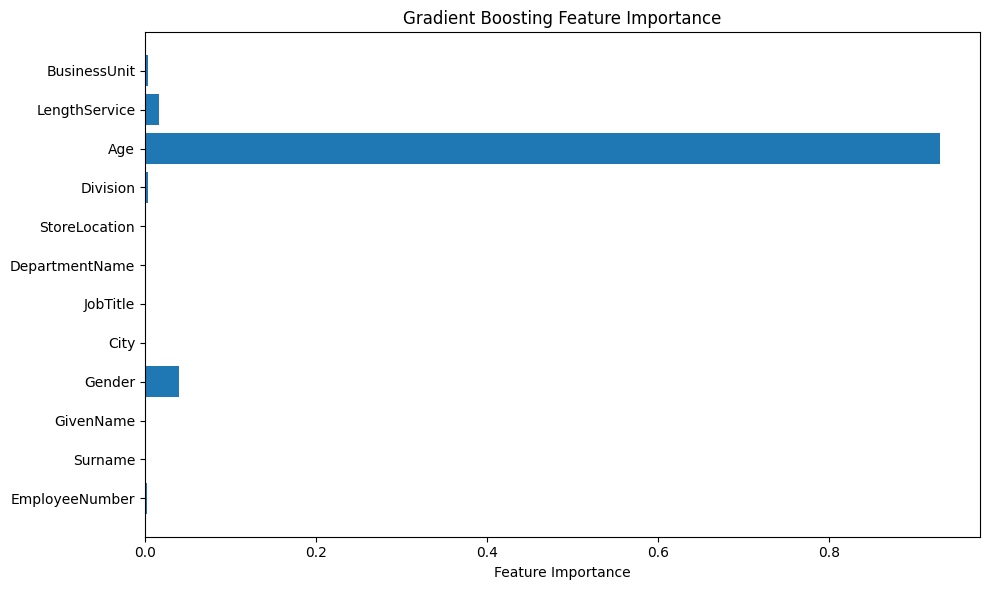

In [35]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 50 candidates, totalling 250 fits

✅ Best Hyperparameters: {'learning_rate': np.float64(0.06442648266371312), 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 227, 'subsample': np.float64(0.903550270105496)}
MAE: 18.68
RMSE: 24.30
R² Score: 0.7422


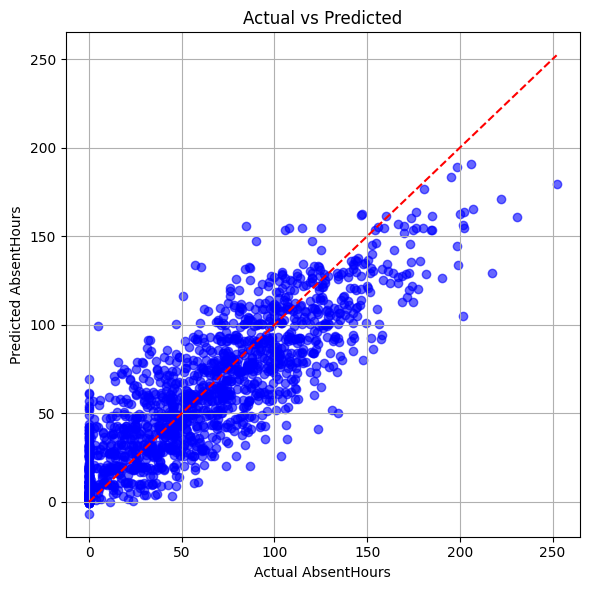

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings('ignore')

# Step 1: Select the improved set of features
selected_features = ['Age', 'Gender', 'LengthService', 'DepartmentName', 'JobTitle', 'StoreLocation']
X = df_encoded[selected_features]
y = df_encoded['AbsentHours']

# Step 2: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define hyperparameter search space
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.05, 0.15),
    'max_depth': randint(2, 6),
    'subsample': uniform(0.8, 0.2),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Step 4: Setup RandomizedSearchCV
gbr = GradientBoostingRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Step 5: Fit the model
random_search.fit(X_train, y_train)

# Step 6: Evaluate the best model
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
r2 = r2_score(y_test, y_pred)

# Step 7: Print Results
print("\n✅ Best Hyperparameters:", random_search.best_params_)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# Step 8: Plot actual vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AbsentHours")
plt.ylabel("Predicted AbsentHours")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
print(df_encoded.dtypes)


EmployeeNumber      int64
Surname             int64
GivenName           int64
Gender              int64
City                int64
JobTitle            int64
DepartmentName      int64
StoreLocation       int64
Division            int64
Age               float64
LengthService     float64
AbsentHours       float64
BusinessUnit        int64
dtype: object


In [61]:
print(df_encoded.head(10))


   EmployeeNumber  Surname  GivenName  Gender  City  JobTitle  DepartmentName  \
0               1     1534       1130       0    28         4               4   
1               2     1596       1438       1    51         4               4   
2               3      930        262       1   179         4               4   
3               4     3369        679       0   226         4               4   
4               5      935        447       1   143         4               4   
5               6     1893        509       1   179         4               4   
6               7      494       1246       1   222         0               0   
7               8     2126        617       1   191         4               4   
8               9     3405        751       1   143         4               4   
9              10      218       1291       1   222         0               0   

   StoreLocation  Division        Age  LengthService  AbsentHours  \
0              4         5  32.028816  

 R² Score: 0.7641
 RMSE: 23.25
 Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}


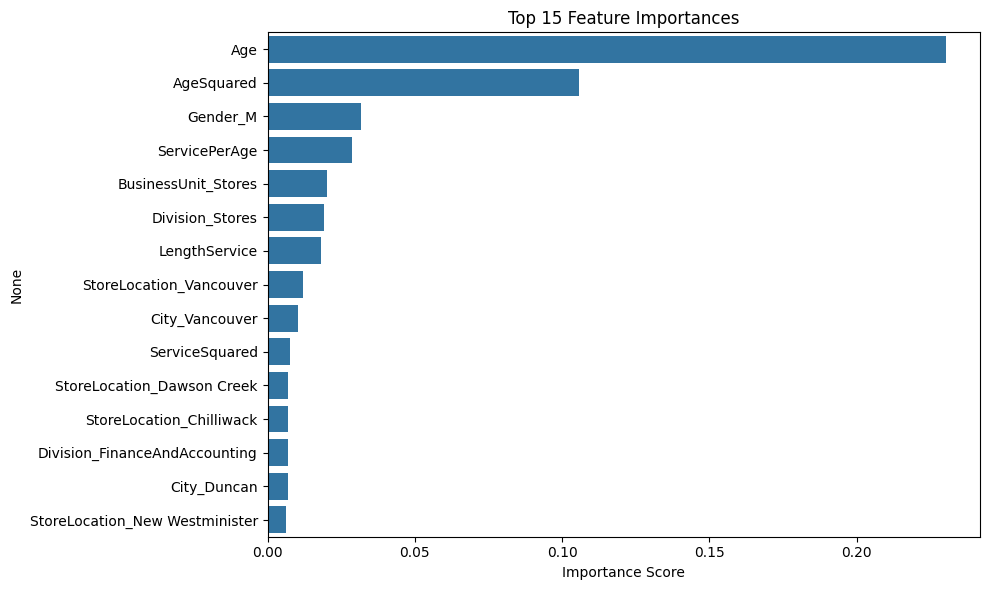

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load dataset
df = pd.read_csv("MFGEmployees.csv")  # Adjust path if needed

# 🔹 Clean unrealistic ages
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

# 🔹 Feature engineering
df['ServicePerAge'] = df['LengthService'] / df['Age']
df['ServiceSquared'] = df['LengthService'] ** 2
df['AgeSquared'] = df['Age'] ** 2

# 🔹 Select relevant columns
df = df[['Gender', 'City', 'JobTitle', 'DepartmentName', 'StoreLocation',
         'BusinessUnit', 'Division', 'Age', 'LengthService',
         'ServicePerAge', 'ServiceSquared', 'AgeSquared', 'AbsentHours']]

# 🔹 One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# 🔹 Drop rows with missing or infinite target values
df_encoded = df_encoded.replace([np.inf, -np.inf], np.nan)
df_encoded = df_encoded.dropna(subset=['AbsentHours'])

# 🔹 Features and target
X = df_encoded.drop('AbsentHours', axis=1)
y = df_encoded['AbsentHours']

# 🔹 Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 🔹 XGBoost model with hyperparameter tuning
xgb = XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0)
param_grid = {
    'n_estimators': [200, 300],
    'learning_rate': [0.03, 0.05],
    'max_depth': [4, 5],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.7, 0.8]
}

grid = GridSearchCV(xgb, param_grid, scoring='r2', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# 🔹 Predict and evaluate
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f" R² Score: {r2:.4f}")
print(f" RMSE: {rmse:.2f}")
print(" Best Params:", grid.best_params_)

# 🔹 Feature Importance Plot
feat_imp = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp.values[:15], y=feat_imp.index[:15])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()